# Rental Prices Regression Project

## 1. Introduction

This notebook analyses the data of the 2024 rental prices across Canada and explores multiple regression models in order to find the one that predicts the price the most accurately.

**About the dataset**

For this project, we will work with the dataset named *25000+ Canadian rental housing market June 2024* that can be found [here](https://www.kaggle.com/datasets/sergiygavrylov/25000-canadian-rental-housing-market-june-2024).

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 2. Exploratory Data Analysis (EDA)

In [8]:
# Load data
df = pd.read_csv('Data/canada_rent.csv')

### 2.1 Data Exploration

In [10]:
df.shape

(25771, 18)

In [11]:
df.sample(5)

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
23109,411464,Longueuil,Quebec,300 Rue Saint-Georges,45.506568,-73.496003,Long Term,Apartment,1895.0,2 Beds,1,NaN,/qc/longueuil/rentals/apartment/1-bedroom/non-...,Unfurnished,August 01,Non-Smoking,False,False
3330,370858,Calgary,Alberta,129 15 Avenue Southeast,51.038318,-114.061831,Long Term,Apartment,2200.0,2 Beds,1,850,/ab/calgary/rentals/apartment/2-bedrooms/victo...,Unfurnished,July 01,Non-Smoking,True,False
13524,571975,Calgary,Alberta,7706 34 Avenue Northwest,51.084105,-114.197994,Long Term,Townhouse,1895.0,2 Beds,1,1050,/ab/calgary/rentals/townhouse/2-bedrooms/bowne...,Unfurnished,August 01,Non-Smoking,False,False
17715,509306,Mississauga,Ontario,70 Park Street East,43.555736,-79.585584,Long Term,Apartment,2885.0,2 Beds,1,937,/on/mississauga/rentals/apartment/1-bedroom/pe...,Unfurnished,June 30,NaN,True,True
15500,500526,Winnipeg,Manitoba,280 River Ave,49.881444,-97.139094,Long Term,Apartment,951.0,2 Beds,1,NaN,/mb/winnipeg/rentals/apartment/1-bedroom/river...,Unfurnished,Immediate,Non-Smoking,True,True


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25771 entries, 0 to 25770
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rentfaster_id      25771 non-null  int64  
 1   city               25771 non-null  object 
 2   province           25771 non-null  object 
 3   address            25646 non-null  object 
 4   latitude           25771 non-null  float64
 5   longitude          25771 non-null  float64
 6   lease_term         25725 non-null  object 
 7   type               25771 non-null  object 
 8   price              25771 non-null  float64
 9   beds               25639 non-null  object 
 10  baths              25637 non-null  object 
 11  sq_feet            21659 non-null  object 
 12  link               25771 non-null  object 
 13  furnishing         25771 non-null  object 
 14  availability_date  25759 non-null  object 
 15  smoking            23069 non-null  object 
 16  cats               255

In [13]:
df.describe()

,rentfaster_id,latitude,longitude,price
count,25771.000000,25771.000000,25771.000000,25771.000000
mean,471913.795274,48.903370,-100.332196,2151.624142
std,120330.335865,3.603257,17.917001,972.820941
min,820.000000,40.741802,-128.661880,0.000000
25%,415749.000000,45.418785,-114.074660,1600.000000
50%,522379.000000,50.913739,-113.513905,2045.000000
75%,563397.500000,51.093585,-79.401311,2550.000000
max,572635.000000,62.459246,-52.695472,29990.000000


In [14]:
df.isnull().sum()

rentfaster_id           0
city                    0
province                0
address               125
latitude                0
longitude               0
lease_term             46
type                    0
price                   0
beds                  132
baths                 134
sq_feet              4112
link                    0
furnishing              0
availability_date      12
smoking              2702
cats                  173
dogs                  173
dtype: int64

### 2.2 Data Cleaning and Preparation

In [16]:
# Get memory usage before cleaning
nbytes_before = df.memory_usage().sum()
nbytes_before

3711156

#### 2.2.1 Convert some string columns into categorical columns

##### Province

In [19]:
df['province'].unique()

array(['Alberta', 'British Columbia', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Nova Scotia',
       'Northwest Territories', 'Ontario', 'Quebec', 'Saskatchewan'],
      dtype=object)

In [20]:
assert df['province'].isnull().sum() == 0

In [21]:
df['province'] = df['province'].astype('category')
df['province'].dtype

CategoricalDtype(categories=['Alberta', 'British Columbia', 'Manitoba', 'New Brunswick',
                  'Newfoundland and Labrador', 'Northwest Territories',
                  'Nova Scotia', 'Ontario', 'Quebec', 'Saskatchewan'],
, ordered=False, categories_dtype=object)

##### Lease term

In [23]:
df['lease_term'].unique()

array(['Long Term', 'Negotiable', 'Short Term', '12 months', 'months',
       '6 months', nan], dtype=object)

In [24]:
df['lease_term'] = df['lease_term'].fillna('Unknown')
assert df['lease_term'].isna().sum() == 0

In [25]:
df['lease_term'] = df['lease_term'].astype('category')
df['lease_term'].dtype

CategoricalDtype(categories=['12 months', '6 months', 'Long Term', 'Negotiable',
                  'Short Term', 'Unknown', 'months'],
, ordered=False, categories_dtype=object)

##### Type

In [27]:
df['type'].unique()

array(['Townhouse', 'Apartment', 'Main Floor', 'House', 'Basement',
       'Duplex', 'Storage', 'Condo Unit', 'Room For Rent', 'Loft',
       'Acreage', 'Office Space', 'Parking Spot', 'Vacation Home',
       'Mobile'], dtype=object)

In [28]:
assert df['type'].isna().sum() == 0

In [29]:
df['type'] = df['type'].astype('category')
df['type'].dtype

CategoricalDtype(categories=['Acreage', 'Apartment', 'Basement', 'Condo Unit', 'Duplex',
                  'House', 'Loft', 'Main Floor', 'Mobile', 'Office Space',
                  'Parking Spot', 'Room For Rent', 'Storage', 'Townhouse',
                  'Vacation Home'],
, ordered=False, categories_dtype=object)

##### Beds

In [31]:
df['beds'].unique()

array(['2 Beds', '3 Beds', 'Studio', '1 Bed', '5 Beds', '4 Beds', nan,
       '6 Beds', 'none Beds', '8 Beds', '7 Beds', '9 Beds'], dtype=object)

In [32]:
df['beds'] = df['beds'].fillna('Unknown')
assert df['beds'].isna().sum() == 0

In [33]:
beds = ['Unknown', 'none Beds', 'Studio', '1 Bed', '2 Beds', '3 Beds', '4 Beds', '5 Beds', '6 Beds', '7 Beds', '8 Beds', '9 Beds']

df['beds'] = pd.Categorical(values=df['beds'], categories=beds, ordered=True)
df['beds'].dtype

CategoricalDtype(categories=['Unknown', 'none Beds', 'Studio', '1 Bed', '2 Beds',
                  '3 Beds', '4 Beds', '5 Beds', '6 Beds', '7 Beds', '8 Beds',
                  '9 Beds'],
, ordered=True, categories_dtype=object)

##### Baths

In [35]:
df['baths'].unique()

array(['2.5', '1', '2', '1.5', '3.5', nan, '4', '3', '5', 'none', '4.5',
       '7.5', '5.5', '6', '6.5', '7', '8', '0'], dtype=object)

In [36]:
df['baths'] = df['baths'].fillna('Unknown')
df['baths'] = df['baths'].replace('none', '0')
assert df['baths'].isna().sum() == 0

In [37]:
baths = ['Unknown', '0', '1', '1.5', '2', '2.5', '3', '3.5', '4', '4.5', '5', '5.5', '6', '6.5' , '7', '7.5', '8']

df['baths'] = pd.Categorical(values=df['baths'], categories=baths, ordered=True)
df['baths'].dtype

CategoricalDtype(categories=['Unknown', '0', '1', '1.5', '2', '2.5', '3', '3.5', '4',
                  '4.5', '5', '5.5', '6', '6.5', '7', '7.5', '8'],
, ordered=True, categories_dtype=object)

##### Furnishing

In [39]:
df['furnishing'].unique()

array(['Unfurnished', 'Furnished', 'Negotiable',
       'Unfurnished, Negotiable'], dtype=object)

In [40]:
df['furnishing'] = df['furnishing'].astype('category')
df['furnishing'].dtype

CategoricalDtype(categories=['Furnished', 'Negotiable', 'Unfurnished',
                  'Unfurnished, Negotiable'],
, ordered=False, categories_dtype=object)

##### Smoking

In [42]:
df['smoking'].unique()

array(['Non-Smoking', 'Smoke Free Building', nan, 'Negotiable',
       'Smoking Allowed'], dtype=object)

In [43]:
df['smoking'] = df['smoking'].fillna('Unknown')
assert df['smoking'].isna().sum() == 0

In [44]:
df['smoking'] = df['smoking'].astype('category')
df['smoking'].dtype

CategoricalDtype(categories=['Negotiable', 'Non-Smoking', 'Smoke Free Building',
                  'Smoking Allowed', 'Unknown'],
, ordered=False, categories_dtype=object)

##### Cats

In [46]:
df['cats'].unique()

array([True, False, nan], dtype=object)

In [47]:
# Let's assume the null values are false
df['cats'] = df['cats'].astype('bool')
assert df['cats'].isna().sum() == 0

In [48]:
df['cats'].dtype

dtype('bool')

##### Dogs

In [50]:
df['dogs'].unique()

array([True, False, nan], dtype=object)

In [51]:
# Same thing as cats
df['dogs'] = df['dogs'].astype('bool')
assert df['dogs'].isna().sum() == 0

In [52]:
df['dogs'].dtype

dtype('bool')

#### 2.2.2 Convert some columns to numerical values

##### Square feet

In [55]:
# Since there are a lot of null values, we will replace them with the average of each type of rental per city
df['sq_feet'].isna().sum()

4112

In [56]:
# Remove strings from values and convert column
df['sq_feet'] = df['sq_feet'].str.replace(',', '')
df['sq_feet'] = df['sq_feet'].str.extract(r'(\d+[.\d]*)')
df['sq_feet'] = df['sq_feet'].astype('float')
assert df['sq_feet'].dtype == 'float64'

In [57]:
# Calculate mean for each group
df['sq_feet'] = df['sq_feet'].fillna(df.groupby(['province', 'city', 'type'], observed=True)['sq_feet'].transform('mean'))
df.sample(5)

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
9914,78120,Calgary,Alberta,104 26 Avenue SW,51.029722,-114.064659,Long Term,Apartment,2404.0,2 Beds,2,1089.0,/ab/calgary/rentals/apartment/2-bedrooms/missi...,Unfurnished,Immediate,Non-Smoking,True,True
20113,560434,Toronto,Ontario,55 Smooth Rose Court,43.774400,-79.333442,Long Term,Apartment,3573.0,2 Beds,2,847.0,/on/toronto/rentals/apartment/1-bedroom/pet-fr...,Unfurnished,July 05,Unknown,True,True
4598,567748,Calgary,Alberta,838 2 Avenue Southwest,51.051890,-114.079312,Negotiable,Condo Unit,7000.0,2 Beds,2.5,1900.0,/ab/calgary/rentals/condo/2-bedrooms/downtown/...,Furnished,Negotiable,Negotiable,True,True
23621,508618,Montréal,Quebec,8205 ave du Cirque,45.562382,-73.615171,Long Term,Apartment,1875.0,1 Bed,1,647.0,/qc/montreal/rentals/apartment/1-bedroom/pet-f...,Unfurnished,July 01,Non-Smoking,True,True
13189,570220,Calgary,Alberta,40 Everstone Drive Southwest,50.908585,-114.105183,Negotiable,House,2500.0,4 Beds,3.5,1500.0,/ab/calgary/rentals/house/4-bedrooms/evergreen...,Unfurnished,July 02,Non-Smoking,True,True


#### Summary

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25771 entries, 0 to 25770
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   rentfaster_id      25771 non-null  int64   
 1   city               25771 non-null  object  
 2   province           25771 non-null  category
 3   address            25646 non-null  object  
 4   latitude           25771 non-null  float64 
 5   longitude          25771 non-null  float64 
 6   lease_term         25771 non-null  category
 7   type               25771 non-null  category
 8   price              25771 non-null  float64 
 9   beds               25771 non-null  category
 10  baths              25771 non-null  category
 11  sq_feet            25564 non-null  float64 
 12  link               25771 non-null  object  
 13  furnishing         25771 non-null  category
 14  availability_date  25759 non-null  object  
 15  smoking            25771 non-null  category
 16  cats

In [60]:
# Get memory usage improvement
nbytes_after = df.memory_usage().sum()
improvement = (nbytes_before - nbytes_after) / nbytes_before
print(f'There is a {improvement:.2%} decrease in memory usage.')

There is a 43.67% decrease in memory usage.


### 2.3 Data Visualization

#### 2.3.1 Correlation between numeric variables

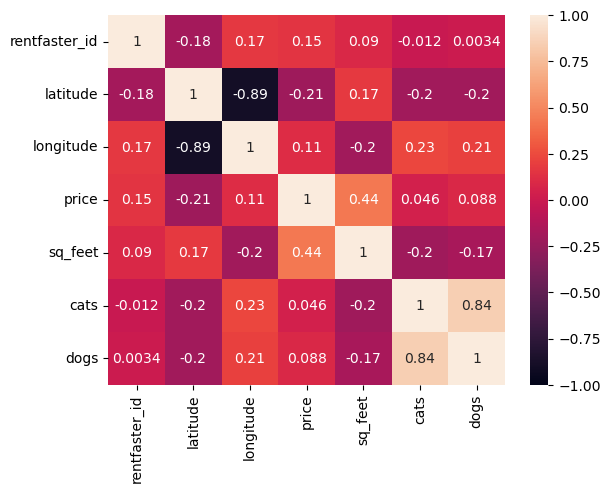

In [63]:
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1);

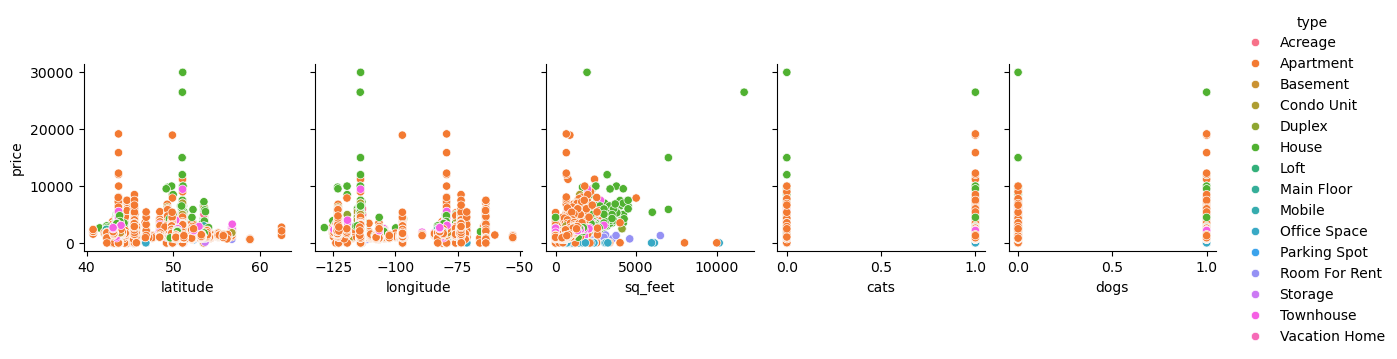

In [64]:
sns.pairplot(df, x_vars=['latitude', 'longitude', 'sq_feet', 'cats', 'dogs'], y_vars=['price'], hue='type');

Based on the correlation coefficient (0.44) and the plots, there seems to be a relationship between the square feet and the price. Also, the places where animals are not accepted seem to be more expensive.

#### 2.3.2 Distribution of the price by province

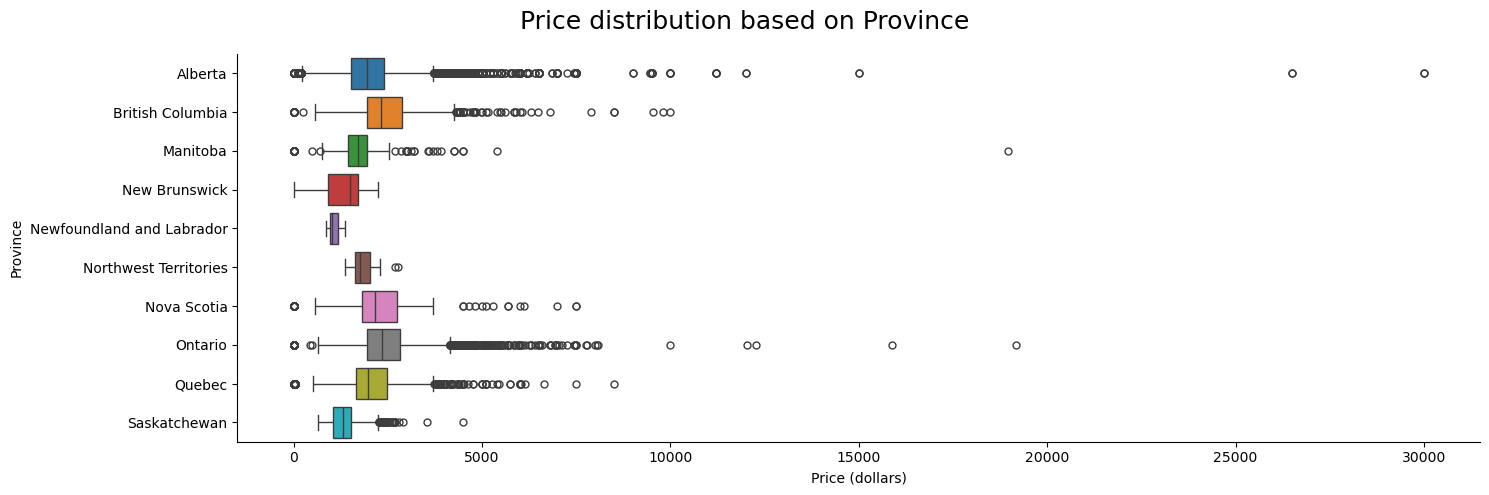

In [67]:
ax = sns.catplot(data=df, x='price', y='province', kind='box', height=5, aspect=3, hue='province')
ax.fig.suptitle('Price distribution based on Province', fontsize=18)
ax.set_xlabels('Price (dollars)')
ax.set_ylabels('Province')
ax.fig.tight_layout();

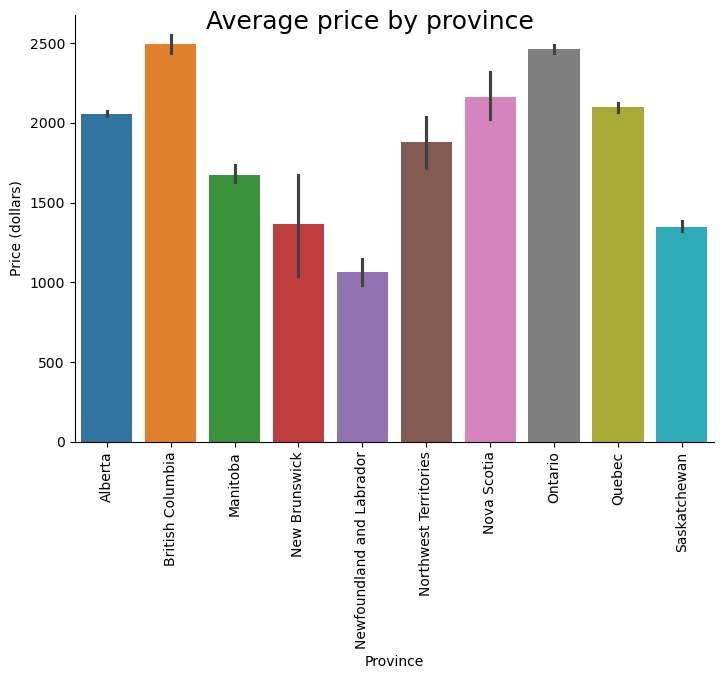

In [68]:
ax = sns.catplot(data=df, x='province', y='price', kind='bar', aspect=1.5, hue='province')
ax.tick_params(axis='x', rotation=90)
ax.fig.suptitle('Average price by province', fontsize=18)
ax.set_xlabels('Province')
ax.set_ylabels('Price (dollars)');

The median and average price is the highest in British Columbia and Ontario.

## 3. Data Preprocessing

## 4. Regression

### 3.1 Find the model

### 3.2 Make predictions

## End